In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from mpl_toolkits.axes_grid1 import make_axes_locatable
import requests
import seaborn as sns

In [3]:
##### SET BASE URL #####

HOST = "https://api.census.gov/data"
year = "2018"
dataset = "acs/acs5"
base_url = "/".join([HOST, year, dataset])

In [7]:
##### These variables are for the totals for each commute category #####

get_vars = ["B08128_001E", "B08128_011E", "B08128_021E", "B08128_031E", "B08128_041E", "B08128_051E", "B08128_061E"]
get_vars = ["NAME"] + get_vars
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "county:*"  ## All counties
predicates["in"]  = "state:47"  ## State of Tennessee

In [8]:
r3 = requests.get(base_url, params=predicates)
col_names = ["NAME", "Total", "Drove_Alone", "Carpooled", "Public_Transport", 
             "Walked", "Taxi_Bikes_Other", "Work_From_Home", "state", "county"]
df3 = pd.DataFrame(columns=col_names, data=r3.json()[1:])
print(df3.head())
df3['GEOID'] = df3['state'] + df3['county']
df3 = df3.drop(['NAME'], axis=1)
df3 = df3.astype({"Total": "int", "Drove_Alone": "int",
                  "Carpooled": "int", "Public_Transport": "int",
                  "Walked": "int", "Taxi_Bikes_Other": "int", "Work_From_Home": "int"})
col_names_core = ["Drove_Alone", "Carpooled", "Public_Transport", "Walked", "Taxi_Bikes_Other", "Work_From_Home"]
for col in col_names_core:
    df3["Pct_" + col] = 100 * df3[col] / df3["Total"]

                           NAME  Total Drove_Alone Carpooled Public_Transport  \
0       Maury County, Tennessee  41466       35804      3177              103   
1       Union County, Tennessee   7114        6092       610                2   
2  Montgomery County, Tennessee  90892       78602      6549              839   
3     Dickson County, Tennessee  22573       18613      2586               13   
4      Morgan County, Tennessee   7030        5786       851                2   

  Walked Taxi_Bikes_Other Work_From_Home state county  
0    426              401           1555    47    119  
1     12               47            351    47    173  
2   1302             1247           2353    47    125  
3    479              167            715    47    043  
4    105               73            213    47    129  


In [12]:
counties = gpd.read_file('../shapefiles/tl_2018_us_county.shp')

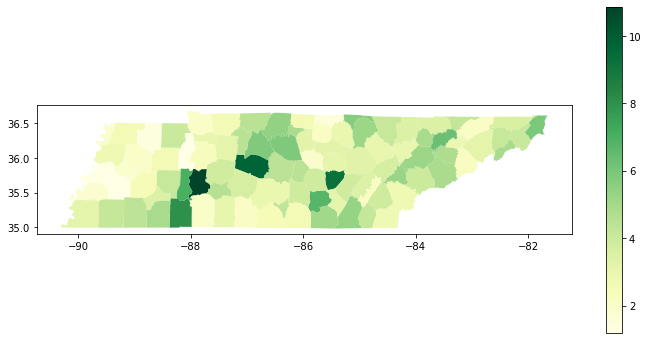

In [14]:
merged_to_tn = counties.merge(df3, on='GEOID')
g_merged_to_tn = gpd.GeoDataFrame(merged_to_tn)
fig, ax = plt.subplots(figsize=(12, 6))
##ax.set_aspect('equal')
g_merged_to_tn.plot(figsize=(24, 24), column="Pct_Work_From_Home", ax=ax, legend=True, cmap="YlGn")
ax=plt.gca() #get the current axes
PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
##plt.colorbar(PCM, ax=ax, orientation='horizontal', cmap="YlGn") 
plt.show()

In [14]:
##### SET BASE URL #####

HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

##### These variables are for the totals for urban designation #####

get_vars = ["H002001", "H002002", "H002003", "H002004", "H002005", "H002006"]
get_vars = ["NAME"] + get_vars
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "county:*"  ## All counties
predicates["in"]  = "state:47"  ## State of Tennessee

r3 = requests.get(base_url, params=predicates)
col_names = ["NAME", "Total", "Urban", "Urban Areas", "Urban Clusters", 
             "Rural", "Not Defined", "state", "county"]
df3 = pd.DataFrame(columns=col_names, data=r3.json()[1:])

In [20]:
df3 = df3.sort_values(by=['county'])
print(df3.head())

                          NAME  Total  Urban Urban Areas Urban Clusters  \
67  Anderson County, Tennessee  34717  23211       20696           2515   
68   Bedford County, Tennessee  18360   8024           0           8024   
69    Benton County, Tennessee   8975   1724           0           1724   
62   Bledsoe County, Tennessee   5718      0           0              0   
63    Blount County, Tennessee  55266  36155       36155              0   

    Rural Not Defined state county  
67  11506           0    47    001  
68  10336           0    47    003  
69   7251           0    47    005  
62   5718           0    47    007  
63  19111           0    47    009  


In [21]:
df2 = df2.sort_values(by=['county'])
print(df2.head())

    Total  Drove_Alone  Carpooled  Public_Transport  Walked  Taxi_Bikes_Other  \
20  32206        27988       2704                85     203               266   
86  21250        17035       3094                32     174               286   
32   5448         4765        520                32      13                53   
76   5603         4300        802                37     176                67   
41  59126        51264       4416               118     414               544   

    Work_From_Home state county  GEOID  Pct_Drove_Alone  Pct_Carpooled  \
20             960    47    001  47001        86.903062       8.395951   
86             629    47    003  47003        80.164706      14.560000   
32              65    47    005  47005        87.463289       9.544787   
76             221    47    007  47007        76.744601      14.313760   
41            2370    47    009  47009        86.702973       7.468795   

    Pct_Public_Transport  Pct_Walked  Pct_Taxi_Bikes_Other  Pct_Work